In [46]:
import sklearn.preprocessing
import nltk
import numpy as np
import pandas as pd
import sklearn.feature_extraction.text as sk
import keras
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohtasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
wordnet = WordNetLemmatizer()
stop_words = stopwords.words("english")

def text_preproc(x):
    
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x

def remove_punctuation(text):
    no_punct=[words for words in text if words not in val]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [48]:
filename2="C:\\Users\\Mohtasim\\Downloads\\test_labels_hinglish.txt"
file2 = open(filename2, encoding="utf8")
Lines = file2.readlines() 
#print(Lines)
op=0
Testlabels=[]
Testids=[]
for line in Lines:
    
    fields=line.split(',')
    if op==0:
        op+=1
        continue
    Testlabels.append(fields[1])
    Testids.append(fields[0])
    
    

print(len(Testlabels))    
file2.close() 

3000


In [49]:
filename="C:\\Users\\Mohtasim\\Downloads\\Hindi_test_unalbelled_conll_updated.txt"
file = open(filename, encoding="utf8")

 
# for line in Lines:
#     print(line)
#     line.split()
#     break;
Words=[]
TestSentences=[]
sum2=0
sum1=0

for line in file:
    sum1+=1
    if(sum1>=84336):
       # print(sum1)
        
        if line!='\n':
            
            fields=line.split()
           # print(fields)
            if fields[0]=="https":
                continue
            if fields[0]=="meta":
                continue
            else:
                Words.append(fields[0])
#                 print(Words)
        if sum1==84362 or line=='\n':
            sent=' '.join(Words)
#             print("End",sent)
            TestSentences.append(sent)
            Words=[]
            sum2=sum2+1
    else:    
        if line!='\n':
            fields=line.split()
            if fields[0]=="https":
                continue
            if fields[0]=="meta":
                continue
            else:
                Words.append(fields[0])
               # print(Words)
        if line=='\n':
            sent=' '.join(Words)
            TestSentences.append(sent)
            Words=[]
            sum2=sum2+1
print(len(TestSentences))    
print(sum1)   
        
file.close()

3000
84362


In [50]:
import string
import re
val=string.punctuation

df1 = pd.DataFrame(list(zip(TestSentences, Testlabels)), 
               columns =['tweet', 'sentiment']) 

df1['tweet']=df1['tweet'].apply(lambda x: text_preproc(x))


df1['tweet']=df1['tweet'].apply(lambda x: remove_punctuation(x))

# def tokenize(text):
#     split=re.split("\W+",text) 
#     return split
# df['title_wo_punct_split']=df['title_wo_punct'].apply(lambda x: tokenize(x.lower()))



df1['tweet']=df1['tweet'].apply(lambda x: deEmojify(x))
df1['sentiment']=df1['sentiment'].apply(lambda x: x.rstrip("\n"))

df1.tail()

,tweet,sentiment
2995,atulreellife haha atulreellife jai ho bhul gy...,neutral
2996,da realest thank putting track can wait next ...,neutral
2997,rt nimra fahad bhaiiiii give us bilal abbas ca...,neutral
2998,rt fralaliciouxxe tbh bad sides say bad horrib...,neutral
2999,bhadasmanki mithleshkumarmi bjpindia sherryon...,negative


In [51]:
filename="C:\\Users\\Mohtasim\\Downloads\\train_conll.txt"
file = open(filename, encoding="utf8")
# Lines = file.readlines() 
  
# for line in Lines:
#     print(line)
#     line.split()
#     break;
Words=[]
labels=[]
Sentences=[]
sum2=0
sum1=0
print("Sum",sum1)
for line in file:
    sum1+=1
    if line!='\n':
        fields=line.split()
        if fields[0]=="http":
            continue
        if fields[0]=="meta":
            labels.append(fields[2])
        else:
            Words.append(fields[0])
           # print(Words)
    if line=='\n':
        sent=' '.join(Words)
        Sentences.append(sent)
        Words=[]
        sum2=sum2+1
    
#print("1111111111"+Sentences[-1])

Sum 0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohtasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
import string
import re
val=string.punctuation

df = pd.DataFrame(list(zip(Sentences, labels)), 
               columns =['tweet', 'sentiment']) 

df['tweet']=df['tweet'].apply(lambda x: text_preproc(x))


df['tweet']=df['tweet'].apply(lambda x: remove_punctuation(x))

# def tokenize(text):
#     split=re.split("\W+",text) 
#     return split
# df['title_wo_punct_split']=df['title_wo_punct'].apply(lambda x: tokenize(x.lower()))



df['tweet']=df['tweet'].apply(lambda x: deEmojify(x))

df



,tweet,sentiment
0,adilnisarbutt pakistan ka ghra tauq pakistan ...,negative
1,madarchod mulle ye mathura nahi dikha tha jab ...,negative
2,narendramodi manya pradhan mantri mahoday shr...,positive
3,atheist krishna jcb full trend chal rahi aa,positive
4,abhisharsharma ravishkumarblog loksabha janta...,positive
...,...,...
15126,rohitsharmawpg asadowaisi narendramodi shame ...,negative
15127,prof hariom jkgrievance bijli mantri people d...,negative
15128,amjedmbt bandisanjay bjp cpkarimnagar telanga...,negative
15129,sunju mishra phir bjp ke leader vikas ke bare...,negative


In [53]:
from sklearn.model_selection import train_test_split

sentences_train = df['tweet'].values
y_train = df['sentiment'].values
# print(y_train.)

sentences_test=df1['tweet'].values
y_test = df1['sentiment'].values

# sentences_train, sentences_test, y_train, y_test = train_test_split(
#    sentences, y, test_size=0.25, random_state=1000)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<15131x39182 sparse matrix of type '<class 'numpy.int64'>'
	with 226116 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.67


In [56]:
y_pred = svm.predict(X_test)
# print(y_pred)
# y_pred[0]
df11 = pd.DataFrame(y_pred,columns=['Sentiment'])
print(df11.shape)
Testids=np.array(Testids)
df22= pd.DataFrame(Testids,columns=['Uid'])
print(df22.shape)

df11.head()
df5=pd.concat([df22,df11], axis=0)
df5["Uid"]=df22["Uid"]
df5["Sentiment"]=df11["Sentiment"]

#df5


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(3000, 1)
(3000, 1)
[[585 289  26]
 [197 731 172]
 [ 31 264 705]]
              precision    recall  f1-score   support

    negative       0.72      0.65      0.68       900
     neutral       0.57      0.66      0.61      1100
    positive       0.78      0.70      0.74      1000

    accuracy                           0.67      3000
   macro avg       0.69      0.67      0.68      3000
weighted avg       0.68      0.67      0.68      3000



In [119]:
# df5.to_csv('C:\\Users\\Mohtasim\\Music\\answers1.csv',index = False)
# fd=open("C:\\Users\\Mohtasim\\Music\\answers1.csv","r")
# d=fd.read()
# fd.close()
# m=d.split("\n")
# s="\n".join(m[:-1])
# fd=open("C:\\Users\\Mohtasim\\Music\\answers1.csv","w+")
# for i in range(len(s)):
#     fd.write(s[i])
# fd.close()

# import csv
# csv_file = "C:\\Users\\Mohtasim\\Music\\answers1.csv"
# txt_file = "C:\\Users\\Mohtasim\\Music\\answer.txt"
# with open(txt_file, "w") as my_output_file:
#     with open(csv_file, "r") as my_input_file:
#         [ my_output_file.write(",".join(row)+'\n') for row in csv.reader(my_input_file)]
#     my_output_file.close()
    
# fd=open("C:\\Users\\Mohtasim\\Music\\answer.txt","r")
# d=fd.read()
# fd.close()
# m=d.split("\n")
# s="\n".join(m[:-1])
# fd=open("C:\\Users\\Mohtasim\\Music\\answer.txt","w+")
# for i in range(len(s)):
#     fd.write(s[i])
# fd.close()

AttributeError: 'matrix' object has no attribute 'todense'

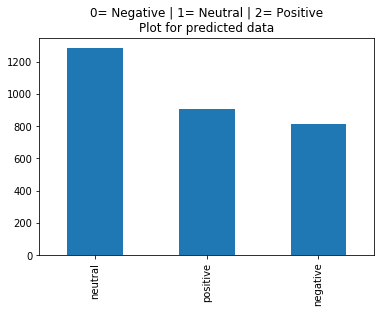

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
pd.value_counts(y_pred).plot.bar()
plt.title('0= Negative | 1= Neutral | 2= Positive'+'\n'+'Plot for predicted data')

plt.show()